# A basic example of using Keras

First we need some imports and initializations.

In [9]:
from keras.models import Sequential  # The model we will use
from keras.layers import Dense
import numpy
import matplotlib.pyplot as plt  # to plot results
# fix random seed - so we have deterministic results
numpy.random.seed(7)

Next we will load some data to play around with - in this case from a .csv file

In [10]:
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]  # first 8 columns (0-7) are input
Y = dataset[:,8]   # one column (8) is output (1 for cancer, 0 for none)
print("nr of samples: "+str(len(X)))
#let's just dump the data to get some idea of how it looks
print(X)
print(Y)


nr of samples: 768
[[   6.     148.      72.    ...,   33.6      0.627   50.   ]
 [   1.      85.      66.    ...,   26.6      0.351   31.   ]
 [   8.     183.      64.    ...,   23.3      0.672   32.   ]
 ..., 
 [   5.     121.      72.    ...,   26.2      0.245   30.   ]
 [   1.     126.      60.    ...,   30.1      0.349   47.   ]
 [   1.      93.      70.    ...,   30.4      0.315   23.   ]]
[ 1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.
  0.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  1.
  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0. 

In [11]:
# create model
model = Sequential()
#first layer with 12 neurons, expecting 8 inputs
# we specify the activation funtions also
# rectifier (relu) is basiscally f(x) = max(0,x)
# see https://en.wikipedia.org/wiki/Rectifier_(neural_networks) for more info
model.add(Dense(12, input_dim=8, activation='relu'))
#second hidden layer with 8 neurons
model.add(Dense(8, activation='relu'))
#final output layer - with 1 neuron. The sigmoid function gives values between 0 and 1.
model.add(Dense(1, activation='sigmoid')) 
# Compile model - could use other optimizers than the one specified here, 'adam'
# try experimenting with other optimizers (training methods) - you could put 'sgd' for
# Stochastic Gradient descent or use the 'adamax' training methods
#https://keras.io/optimizers/
#another common loss function is 'mean_squared_error', but binarY-crossentropy is good for classifications
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


We can also try to visualize the model - just to be sure it looks like we have expected.

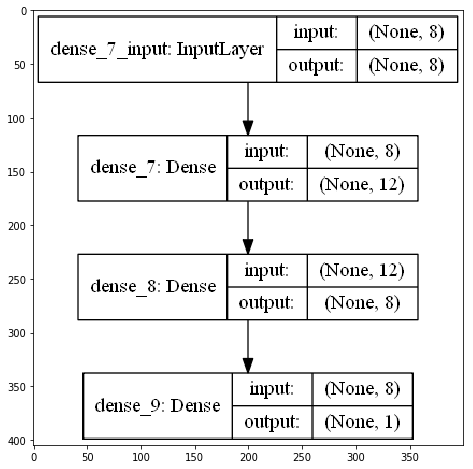

In [12]:
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg

filename = 'model_nn_plot.png'
#writing the model visualization to a .png file
plot_model(model, to_file=filename, show_shapes=True, show_layer_names=True)
img=mpimg.imread(filename) # read this pgn file

plt.figure(figsize=(8,8)) # setting the size to 10 x 10 inches of the figure.
imgplot = plt.imshow(img) # plot the image.
plt.show()

Now we have our model ready to be trained as we have defined the training function, the loss function 
(that will be minized by the training function ) and what we want to track along. We also want to save the history of the training - just for looking "under the hood" of what goes on and how the training is progressing.

In [13]:
history = model.fit(X, Y, epochs=150, batch_size=10,verbose=2)
# evaluate the model - normally you would evaluate the model on other data than what you trained it on
scores = model.evaluate(X, Y)
finalscore = scores[1]*100
print("\nFinal score: %s: %.2f%%" % (model.metrics_names[1], finalscore))

Epoch 1/150
 - 0s - loss: 3.6813 - acc: 0.5964
Epoch 2/150
 - 0s - loss: 0.9312 - acc: 0.5977
Epoch 3/150
 - 0s - loss: 0.7468 - acc: 0.6380
Epoch 4/150
 - 0s - loss: 0.7106 - acc: 0.6576
Epoch 5/150
 - 0s - loss: 0.6821 - acc: 0.6732
Epoch 6/150
 - 0s - loss: 0.6514 - acc: 0.6875
Epoch 7/150
 - 0s - loss: 0.6496 - acc: 0.6719
Epoch 8/150
 - 0s - loss: 0.6358 - acc: 0.6875
Epoch 9/150
 - 0s - loss: 0.6236 - acc: 0.6914
Epoch 10/150
 - 0s - loss: 0.6289 - acc: 0.6771
Epoch 11/150
 - 0s - loss: 0.6462 - acc: 0.6719
Epoch 12/150
 - 0s - loss: 0.6376 - acc: 0.6693
Epoch 13/150
 - 0s - loss: 0.6246 - acc: 0.6784
Epoch 14/150
 - 0s - loss: 0.6174 - acc: 0.7005
Epoch 15/150
 - 0s - loss: 0.6017 - acc: 0.6979
Epoch 16/150
 - 0s - loss: 0.5882 - acc: 0.7031
Epoch 17/150
 - 0s - loss: 0.5843 - acc: 0.6979
Epoch 18/150
 - 0s - loss: 0.5997 - acc: 0.6810
Epoch 19/150
 - 0s - loss: 0.5801 - acc: 0.7109
Epoch 20/150
 - 0s - loss: 0.5802 - acc: 0.7187
Epoch 21/150
 - 0s - loss: 0.5684 - acc: 0.7188
E

Let's plot how the accurary of the training improves with more iterations - up til a certain point.

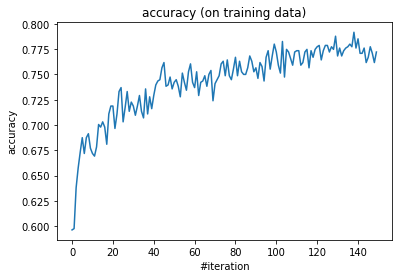

In [14]:
#make a new figure
plt.figure()
#plot the accurary of each iteration
plt.plot(history.history['acc'])
plt.title('accuracy (on training data)')
plt.ylabel('accuracy')
plt.xlabel('#iteration')

plt.show()


Now we of course start to use the model for predictions on unknown data, which is the whole point of training

In [15]:
# calculate predictions
row = X[0:1,0:8]
print(str(row)+" is classified as "+str(Y[0])+" in training data")
predictions = model.predict(row)
# round predictions
rounded = [round(x[0]) for x in predictions]
print("predicted as : "+str(rounded))

[[   6.     148.      72.      35.       0.      33.6      0.627   50.   ]] is classified as 1.0 in training data
predicted as : [1.0]


In [16]:
print("As you can see in this case the prediction matches would is in the training data.")
print("This is of course not always the case - here the accuracy was "+str(finalscore))

As you can see in this case the prediction matches would is in the training data.
This is of course not always the case - here the accuracy was 79.9479166667
